# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Part 1: Preprocessing

## Functions

In [3]:
# استخراج داده از فایل csv
def extractCSV(path):
    return pd.read_csv(path)


# تابع برای نمایش داده
def displayData(data):
    print(data.to_string())
    print(100*"-")

# حذف ستون
def dropColumn(data,col):
    data.drop(col,axis=1,inplace=True)
    return data

# لیبل انکود کردن
def labelEncoder(data,col):
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    return data

# چک کردن داده‌های پرت
def checkOutliers(data,col):
    fig=px.box(data,y=col)
    fig.show()


# نرمال سازی
def MinMaxScalerFunc(data,columns):
    scaler=MinMaxScaler()
    data=scaler.fit_transform(data)
    data=pd.DataFrame(data)
    data.columns=columns
    return data

## Main

In [5]:
# استخراج
data=extractCSV("loans.csv")

# لیبل انکود کردن ستون ‌loan_type
data=labelEncoder(data,'loan_type')

# print(data.isnull().sum())    # داده‌ی خالی ندارد
# print(data.duplicated().sum())      # داده‌ی تکراری ندارد

# حذف ستون‌های غیر لازم
data=dropColumn(data,'client_id')
data=dropColumn(data,'loan_id')
data=dropColumn(data,'loan_start')
data=dropColumn(data,'loan_end')

# # بررسی داده‌های پرت
# checkOutliers(data,'loan_amount')              # داده پرت ندارد
# checkOutliers(data,'rate')

# نرمال سازی
data=MinMaxScalerFunc(data,columns=['loan_type','loan_amount','repaid','rate'])


# پیش پردازش در این حد کافی است و به موارد دیگر لازم نیست


# تقسیم داده‌‌ها به دو بخش
trainData=data.iloc[:380,:]
testData=data.iloc[380:,:]

# Part 2: Machine Learning

## Single Variable Linear Regression

Mean Squared Error: 0.08345334562398805
R2 Score: 0.0006436724808278615


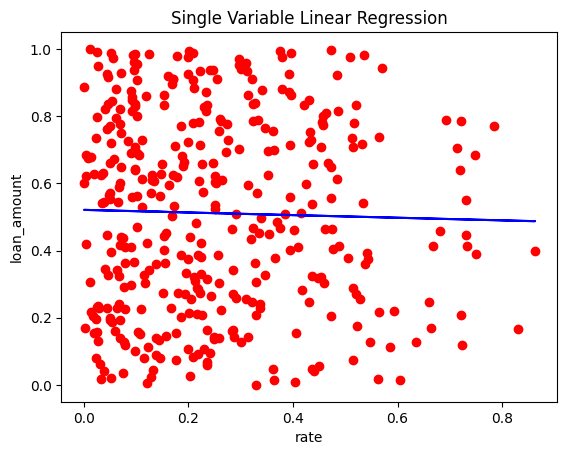

test y: [0.28337497 0.61740216 0.87225923 0.68963364 0.41888704 0.80349709
 0.68123786 0.59048016 0.15112406 0.53767694 0.6301693  0.12704691
 0.83374965 0.87621427 0.47273106 0.83451291 0.99798779 0.02962809
 0.31473772 0.55772967 0.04933389 0.83347211 0.36074105 0.50097141
 0.90882598 0.73986955 0.86892867 0.66354427 0.42339717 0.77810158
 0.09776575 0.24417152 0.34658618 0.97973911 0.13967527 0.55939495
 0.87857341 0.73966139 0.78989731 0.12503469 0.60623092 0.52553428
 0.38100194 0.86427977 0.50770192 0.13197336 0.96183736 0.77650569
 0.37822648 0.53968915 0.60296975 0.57868443 0.05606439 0.56383569
 0.20475992 0.00652234 0.91361366 0.97377186 0.86067166 0.08111296
 0.60852068 0.25242853 0.21398834]
predicted y: [0.51987108 0.51368167 0.51959256 0.50835878 0.51334125 0.50631627
 0.51869509 0.50306683 0.50192179 0.52002582 0.51519808 0.51163916
 0.50619248 0.5149505  0.50591396 0.51405304 0.51501239 0.5191593
 0.5055426  0.49823909 0.49062611 0.51816899 0.51519808 0.49248294
 0.5034

In [6]:
# using "rate" as feature and "loan_amount" as target
X=np.array(trainData.rate).reshape(-1,1)
y=np.array(trainData.loan_amount)

# Create regression model
model=LinearRegression()

# Training the model
model.fit(X,y)

# Predict values
y_pred=model.predict(X)

# Calculating the Mean Squared Error (MSE)
mse=mean_squared_error(y,y_pred)

# Calculating the R-squared score
r2=r2_score(y,y_pred)

# Show results
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

# using testData for testing the model
new_X=np.array(testData.rate).reshape(-1,1)
new_y=np.array(testData.loan_amount)

# Predict values for testData
new_y_pred=model.predict(new_X)

# plot the results
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,color='blue')
plt.title('Single Variable Linear Regression')
plt.xlabel('rate')
plt.ylabel('loan_amount')
plt.show()

# comparing predicted values and real values for testData
print(f"test y: {new_y}")
print(f"predicted y: {new_y_pred}")


## Multi Variable Linear Regression

Mean Squared Error: 0.08316022880233273
R2 Score: 0.0041537552490297225


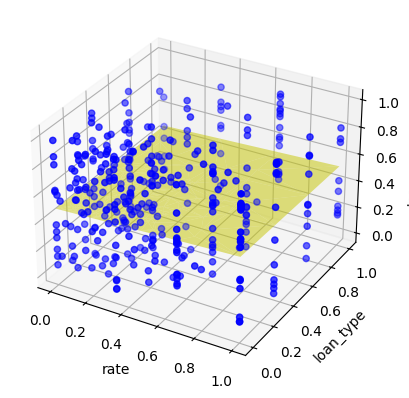

test y: [0.28337497 0.61740216 0.87225923 0.68963364 0.41888704 0.80349709
 0.68123786 0.59048016 0.15112406 0.53767694 0.6301693  0.12704691
 0.83374965 0.87621427 0.47273106 0.83451291 0.99798779 0.02962809
 0.31473772 0.55772967 0.04933389 0.83347211 0.36074105 0.50097141
 0.90882598 0.73986955 0.86892867 0.66354427 0.42339717 0.77810158
 0.09776575 0.24417152 0.34658618 0.97973911 0.13967527 0.55939495
 0.87857341 0.73966139 0.78989731 0.12503469 0.60623092 0.52553428
 0.38100194 0.86427977 0.50770192 0.13197336 0.96183736 0.77650569
 0.37822648 0.53968915 0.60296975 0.57868443 0.05606439 0.56383569
 0.20475992 0.00652234 0.91361366 0.97377186 0.86067166 0.08111296
 0.60852068 0.25242853 0.21398834]
predicted y: [0.49479902 0.49186488 0.49963238 0.489846   0.5247562  0.5002821
 0.5153928  0.51523325 0.50526571 0.50585598 0.53994129 0.48827183
 0.51229734 0.51347947 0.49074662 0.50085621 0.50575232 0.50178276
 0.50807355 0.51746389 0.48866254 0.51257265 0.51586023 0.49656256
 0.5071

In [23]:
# using "rate" and "loan_type" as features and "loan_amount" as target
X=np.array([trainData.rate,trainData.loan_type]).reshape(-1,2)
y=np.array(trainData.loan_amount)

# Create regression model
model=LinearRegression()

# Training the model
model.fit(X,y)

# Predict values
y_pred=model.predict(X)

# Calculating the Mean Squared Error (MSE)
mse=mean_squared_error(y,y_pred)

# Calculating the R-squared score
r2=r2_score(y,y_pred)

# Show results
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

# using testData for testing the model
new_X=np.array([testData.rate,testData.loan_type]).reshape(-1,2)
new_y=np.array(testData.loan_amount)

# Predict values for testData
new_y_pred=model.predict(new_X)

# plot the results
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,color='blue')
ax.plot_trisurf(X[:,0].flatten(),X[:,1].flatten(),y_pred.flatten(),color='#ff0',alpha=0.5)
ax.set_xlabel('rate')
ax.set_ylabel('loan_type')
ax.set_zlabel('loan_amount')
plt.show()

# comparing predicted values and real values for testData
print(f"test y: {new_y}")
print(f"predicted y: {new_y_pred}")

## Plynomial Regression

In [29]:
# defining features and the target
X_train=np.array([trainData.loan_type,trainData.repaid,trainData.rate]).reshape(-1,3)
y_train=np.array(trainData.loan_amount)
X_test=np.array([testData.loan_type,testData.repaid,testData.rate]).reshape(-1,3)
y_test=np.array(testData.loan_amount)



model=LinearRegression()
pf=PolynomialFeatures(degree=2)
X_train_poly=pf.fit_transform(X_train)
X_test_poly=pf.transform(X_test)
model.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)

model.score(X_test_poly,y_test)

-0.020212658242600545